# Input

In [137]:
A_code = [1,0,0,1,0,1,1,1]
A_message = [1,0,0,1]

B_code = [0,0,1,1,1,1,0,1]
B_message = [0,0,1,1]

# encode the messages and convert to analog
A_encoded = encodeMessage(A_code, A_message)
A_encoded_analog = convertBitsToAnalog(A_encoded)
A_code_analog = convertBitsToAnalog(A_code)
B_encoded = encodeMessage(B_code, B_message)
B_encoded_analog = convertBitsToAnalog(B_encoded)
B_code_analog = convertBitsToAnalog(B_code)

# combine the messages
combined_analog = combineMessages(A_encoded_analog, B_encoded_analog)

# recover the analog messages and convert to bits
A_recovered_analog = decodeMessage(combined_analog, A_code_analog)
B_recovered_analog = decodeMessage(combined_analog, B_code_analog)
A_recovered = convertAnalogToBits(A_recovered_analog)
B_recovered = convertAnalogToBits(B_recovered_analog)

# create some 'extended' lists to make printing nice
A_message_extended = extend_message(A_message, A_code)
A_code_extended = extend_code(A_message, A_code)
A_code_analog_extended = extend_code(A_message, A_code_analog)
B_message_extended = extend_message(B_message, B_code)
B_code_extended = extend_code(B_message, B_code)
B_code_analog_extended = extend_code(B_message, B_code_analog)

# Print progression of encoding, combining, and decoding

In [138]:
print("The original A message and code:")
print_bits('A', A_message)
print_bits('A code', A_code)
print()

print("XOR each bit of the message with all the bits of the code and convert to analog:")
print("(I\'ve repeated each bit of the message to make this easier to see)")
print_bits('A', A_message_extended, 8)
print_bits('A code', A_code_extended, 8)
print_bits('A encoded', A_encoded, 8)
print_bits('A encoded (V)', A_encoded_analog, 8)
print()

print("The original B message and code:")
print_bits('B', B_message)
print_bits('B code', B_code)
print()

print("XOR each bit of the message with all the bits of the code and convert to analog:")
print("(NOTE:  I've repeated each bit of the message to make this easier to see)")
print_bits('B', B_message_extended, 8)
print_bits('B code', B_code_extended, 8)
print_bits('B encoded', B_encoded, 8)
print_bits('B encoded (V)', B_encoded_analog, 8)
print()

print("Combine the encoded A and B messages:")
print_bits('A encoded (V)', A_encoded_analog, 8)
print_bits('B encoded (V)', B_encoded_analog, 8)
print_bits('combined  (V)', combined_analog, 8)
print()

print("Recover the A message by taking the dot product of the combined message with the A code:")
print("(NOTE:  that we're still in the analog domain, so we use an analog version of the code)")
print("(NOTE:  we actually recover an inversion of the original message)")
print_bits('combined  (V)', combined_analog, 8)
print_bits('A code    (V)', A_code_analog_extended, 8)
print_bits('product   (V)', list_mult(combined_analog, A_code_analog_extended), 8)
print_bits('A decoded (V)', A_recovered_analog)
print_bits('A decoded', A_recovered)
print_bits('A original', A_message)
print()

print("Recover the B message by taking the dot product of the combined message with the A code:")
print("(NOTE:  that we're still in the analog domain, so we use an analog version of the code)")
print("(NOTE:  we actually recover an inversion of the original message)")
print_bits('combined  (V)', combined_analog, 8)
print_bits('B code    (V)', B_code_analog_extended, 8)
print_bits('product   (V)', list_mult(combined_analog, B_code_analog_extended), 8)
print_bits('B decoded (V)', B_recovered_analog)
print_bits('B decoded', B_recovered)
print_bits('B original', B_message)

The original A message and code:
A            : 1 0 0 1
A code       : 1 0 0 1 0 1 1 1

XOR each bit of the message with all the bits of the code and convert to analog:
(I've repeated each bit of the message to make this easier to see)
A            : 1 1 1 1 1 1 1 1 | 0 0 0 0 0 0 0 0 | 0 0 0 0 0 0 0 0 | 1 1 1 1 1 1 1 1 |
A code       : 1 0 0 1 0 1 1 1 | 1 0 0 1 0 1 1 1 | 1 0 0 1 0 1 1 1 | 1 0 0 1 0 1 1 1 |
A encoded    : 0 1 1 0 1 0 0 0 | 1 0 0 1 0 1 1 1 | 1 0 0 1 0 1 1 1 | 0 1 1 0 1 0 0 0 |
A encoded (V):-1 1 1-1 1-1-1-1 | 1-1-1 1-1 1 1 1 | 1-1-1 1-1 1 1 1 |-1 1 1-1 1-1-1-1 |

The original B message and code:
B            : 0 0 1 1
B code       : 0 0 1 1 1 1 0 1

XOR each bit of the message with all the bits of the code and convert to analog:
(NOTE:  I've repeated each bit of the message to make this easier to see)
B            : 0 0 0 0 0 0 0 0 | 0 0 0 0 0 0 0 0 | 1 1 1 1 1 1 1 1 | 1 1 1 1 1 1 1 1 |
B code       : 0 0 1 1 1 1 0 1 | 0 0 1 1 1 1 0 1 | 0 0 1 1 1 1 0 1 | 0 0 1 1 1 1 0 1 

# Plot the original and combined messages

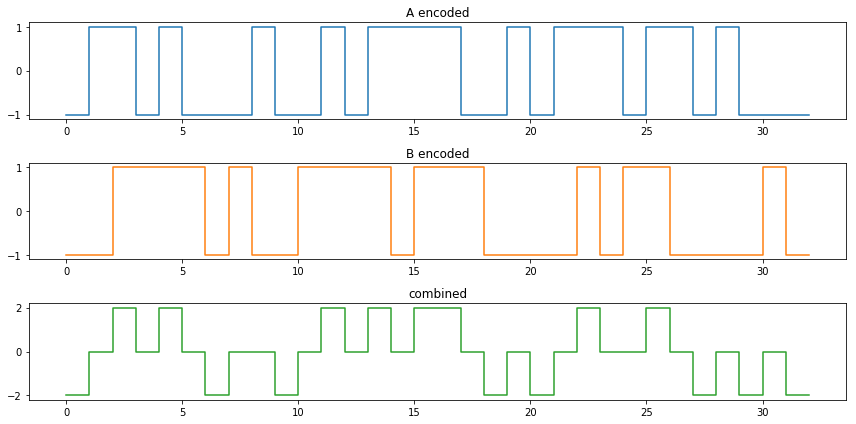

In [134]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

plt.figure(1, figsize = (12,6))

plt.subplot(3,1,1)
x_axis, y_axis = convertForPlotting(A_encoded_analog)
plt.plot(x_axis, y_axis, label = 'A encoded', color = 'C0')
plt.title('A encoded')

plt.subplot(3,1,2)
x_axis, y_axis = convertForPlotting(B_encoded_analog)
plt.plot(x_axis, y_axis, label = 'B encoded', color = 'C1')
plt.title('B encoded')

plt.subplot(3,1,3)
x_axis, y_axis = convertForPlotting(combined_analog)
plt.plot(x_axis, y_axis, label = 'combined', color = 'C2')
plt.title('combined')

plt.tight_layout();

# Functions

## Plotting functions

In [133]:
def convertForPlotting(bits):
    y_axis = []
    x_axis = []
    for idx in range(0,len(bits)):
        y_axis.append(bits[idx])
        y_axis.append(bits[idx])
        x_axis.append(idx)
        x_axis.append(idx+1)
    
    return x_axis, y_axis

def insertYOffset(y_axis, offset):
    for idx in range(0,len(y_axis)):
        y_axis[idx] += offset
    
    return y_axis

## Encode a message with a chipping sequence

In [11]:
# this performs the xor of each bit of the message with the full chipping sequence
# it assumes that the message and code are still both binary
def encodeMessage(code, message):
    encoded_message = []
    for mbit in message:
        for cbit in code:
            if mbit == cbit:
                encoded_message.append(0)
            else:
                encoded_message.append(1)
    return encoded_message

## Convert a bit sequence to an analog waveform

In [20]:
# this maps b'1 -> +1V and b'0 -> -1V to approximate an analog waveform representing a given bit sequence
def convertBitsToAnalog(bits):
    voltages = []
    for bit in bits:
        if bit == 1:
            voltages.append(1)
        else:
            voltages.append(-1)
    return voltages

## Simulate the interference of two encoded messages

In [21]:
# this basically assumes that the two messages are in sync and interfere perfectly
def combineMessages(A_encoded, B_encoded):
    combined = []
    for idx in range(0,len(A_encoded)):
        combined.append(A_encoded[idx] + B_encoded[idx])
    return combined

## Decode message

In [55]:
# this performs the dot product of the combined message and the (analog) chipping sequence
# it then sums each block (representing one bit) to recover the original bit
def decodeMessage(combined_analog, code_analog):
    block_size = len(code_analog)
    
    # if the code is k-bits, and the original message was n-bits, then the encoded message was n*k bits
    # num_blocks is the size of the original message, n
    # each block represents one bit from the original message
    num_blocks = int(len(combined_analog)/len(code_analog))
    
    decoded = []
    # iterate through each block (each bit of the original message)
    for block in range(0, num_blocks):
        block_sum = 0
        # take the dot product of the code and the block by multiplying corresponding bits and summing
        for idx in range(0,block_size):
            block_sum += code_analog[idx] * combined_analog[block*block_size + idx]
        
        # the dot product will either be 1 or 0
        decoded.append(int(block_sum/block_size))
        
    return decoded

## Convert an analog waveform back to a bit sequence

In [70]:
# maps +1V -> b'1 and -1V -> b'0
def convertAnalogToBits(voltages):
    bits = []
    for voltage in voltages:
        if voltage == 1:
            bits.append(1)
        else:
            bits.append(0)
    return bits

## Helper functions

In [132]:
def print_bits(name, bits, block_size=0):
    print('{:13s}:'.format(name), end='')
    for idx in range(0,len(bits)):
        print('{:2d}'.format(bits[idx]), end='')
        if block_size != 0 and (idx+1)%block_size == 0:
            print(' |', end='')
    print('')

def extend_message(message, code):
    extended_message = []
    for mbit in message:
        for cbit in code:
            extended_message.append(mbit)
    return extended_message
            
def extend_code(message, code):
    extended_code = []
    for mbit in message:
        for cbit in code:
            extended_code.append(cbit)
    return extended_code

def list_mult(list_a, list_b):
    product = []
    for idx in range(0, len(list_a)):
        product.append(list_a[idx]*list_b[idx])
    return product